# Clase 21: GBM

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Ignacio Meza**

## Gradient Boosting Machines (GBM)

las maquinas de gradient boosting son algoritmos que se volvieron muy populares con la aparición de XGBoost en el 2016 para las tareas de clasificación y regresión. En términos de funcionamiento, estos algoritmos utilizan multiples "weak-learners" con los que a través de multiples iteraciones corrigen los errores que presentan sus regresores/clasificadores en etapas anteriores.

		❓ Pregunta: ¿Que caracteristicas tienen los "weak-learners"?

>> 1.  El objetivo no es crear clasificadores potentes con ellos, si no como su nombre lo dice queremos generar "aprendices débiles" que se potencien con otros.
>> 2. En general se utilizan como weak learners arboles de decisión por su simpleza y versatilidad que nos ofrecen para regresión y clasificación.
>> 3. Pueden ser entrenados con una muestra de la totalidad para obtener entrenamientos rápidos sobre ellos.
>> 4. Su uso en un algoritmo implica la comprensión de estos elementos, ya que se heredan sus problemas en una estructura mas compleja.


❓ Pregunta: ¿Que problemas tenian los arboles de decisión?
![3 Techniques to Avoid Overfitting of Decision Trees | by Satyam Kumar |  Towards Data Science](https://miro.medium.com/v2/resize:fit:1702/1*KbRVJC5B0EgO8YAyeCrLkA.png)

Recordar que los árboles de decisión son elementos que tienen una alta facilidad de sobre-ajustarse si aumentamos la profundidad o número de hijos por nodo. Esto puede causar problemas en un algoritmo de GBM y por ello, este debe ser un valor que debemos controlar de forma directa o indirectamente.

Adentrándonos mas en detalles en el algoritmo de gradient boosting, estos forman parte de los algoritmos de ensemble, quienes basicamente son algoritmos que combinan multiples modelos para el proceso de predicción. Una forma de esto es a traves de modelos aditivos, donde entrenando multiples algoritmos simples de forma independiente, utilizamos la suma de sus salidas para generar un modelo mas potente para la regresión/clasificación:
$$F_M(x) = f_1(x)+...+f_M(x)=\sum_{m=1}^M f_m(x)$$
![Develop an Intuition for How Ensemble Learning Works -  MachineLearningMastery.com](https://machinelearningmastery.com/wp-content/uploads/2020/07/Example-of-Combining-Decision-Boundaries-Using-an-Ensemble.png)


### GBM: Regresión

La idea que sigue por detras las GBM es realizar descenso del gradiente a una función $\hat{f}$ en el espacio de funciones. O sea, si utilizamos un conjunto $f$ de funciones deseamos disminuir, todo lo posible la función de error que representa la función de perdida ($\mathcal{L}$) durante el entrenamiento. Formalmente:	
$$\hat{f}=argmin_f \, \mathcal{L}(f)$$
donde $f$:
$$f = (f(x_1), ..., f(x_N))$$
Donde en cada paso $m$ (número de la iteración) generaremos un gradiente $g_m$ de la función $\mathcal{L(f_m)}$ :
$$g_m = [\dfrac{\partial{l}(y_i,f(x_i))}{\partial{f}(x_i)}]_{f=f_{m-1}}$$
En cada una de las iteraciones del modelo $g_m$ se encargara de actualizar el valor de $f_{m-1}$, de tal forma de generar la función $f_m$ de la iteración. $g_m$ es la expresión matematica que contiene la información de los errores de la predicción anterior que deseamos corregir en cada iteración. 

Luego, para comprender la actualización situémonos en el paso $m$, en el tendremos:
$$f_m = f_{m-1} - \beta_{m}g_{m}$$
Donde $\beta_m$ se define como el largo del paso en la corrección. Visto de otra forma, podemos interpretar esta valor como un factor de aprendizaje que podremos fijar o optimizar en la función, señalando cuanta corrección aplicaremos del proceso anterior en el proceso actual. 

Si bien en cada una de las iteraciones encontraremos un valor optimo para $f_m$ y $N$ puntos, esta por si sola no genera un clasificador global capaz de obtener mejores generalizaciones, por esta razón necesitamos definir una nueva función con la misma idea pero que en cada iteración se haga mas robusta. En esta modificación, el algoritmo para ajustar los weak-learners a una aproximación de la señal negativa del gradiente, donde en cada iteración entrenara un nuevo weak learner, quedando la actualización de la función como:
$$F_m = argmin_F \sum_{i=1}^N (-g_{im}-F(x_i))^2$$
Notar que $F(x_i)$ es un weak learner que se entrena en cada una de las iteraciones de nuestro algoritmo de GBM.

Finalmente el algoritmo se vería como:

![[Pasted image 20230527153450.png]]


### GBM: Clasificación

		❓ Pregunta: ¿Debería ser diferente la clasificación a la regresión?

La respuesta directa a esto es "sí". Los cambios que presenta la clasificación respecto a la regresión se dan netamente en la elección de la función de perdida ($\mathcal{L}$) y algunas consideraciones que se toman para las salidas de los nodos.

Respecto a las funciones de perdida, esto se debe a como se define el problema de clasificación supervisada, donde nuestro interés no será la reducción el error que tenemos del valor estimado respecto a un valor continuo. En su reemplazo son utilizadas funciones de perdida para clasificación, quienes tienen como principal objetivo disminuir el error predecir una etiqueta. Una de las funciones de perdidas mas conocidas/utilizadas para el problema de clasificación se encuentra la logistic-loss/cross-entropy:
$$\mathcal{L}_i = -y_i log(p_i) + (1-y_i)log(1-p_i)$$
	❓ Pregunta:  ¿Como podemos interpretar esta función de perdida?
	
Donde su derivada es:
$$\dfrac{\partial \mathcal{L}_i}{\partial \hat{y}}=p_i-y_i$$
El segundo punto a considerar es que la estimación de $y$ sera igual a:
$$\hat{y}=log(odds)=log(\dfrac{p}{1-p})$$
		❓ Pregunta:  ¿Por que usamos odds?
		
Básicamente debido a que los modelos de clasificación con GBM son modelos de regresión, por lo que sus salidas no pueden ser consideradas como probabilidades, sino como scores que debemos transformar y normalizar.

Finalmente para calcular las probabilidades de las salidas de nuestro GBM tendremos que calcular la función softmax de $\hat{y}$, la que viene dada por:
$$\text{softmax}(\hat{y})=\dfrac{1}{1+e^{-\hat{y}}}$$

### Retrospectiva

		❓ Pregunta: ¿Pero como podriamos simplificar estas definiciones que acabamos de dar?

Si visualizamos GBM en un juego de golf, tendriamos un jugador que comienza con un tiro $f_0$, el cual a medida que va realizando cada tiro va aplicando una corrección $\Delta_m$ en cada una de sus jugadas. Con esto, si cerebralmente el jugador corrigue sus errores a traves de una función MSE, tendremos que el jugador ira optimizando esta función hasta meter la pelota en el agujero (minimo de la función de perdida).

$\text{MSE LOSS} = \mathcal{L}(y, F_M(X))=\dfrac{1}{N} \sum_{i=1}^N (y_i - F_M(x_i))^2$

![](https://explained.ai/gradient-boosting/images/golf-MSE.png)

		❓ ¿Como podría el golfista correguir de mejor forma sus tiros? ¿existe alguna forma?.
		
![1d-vectors.png](https://explained.ai/gradient-boosting/images/1d-vectors.png)

Como vimos durante el entrenamiento de GBM, este proceso considera un $\nu$ conocido como shrinkage rate o learning rate. Este valor nos permitirá realizar correcciones en las actualizaciones de nuestras funciones $f_m$, ya que podría darse el caso que el gradiente obtenido durante la optimización sea muy alto y nos permita obtener un minimo adecuado para el problema. De esta forma:
$$f_m(x) = f_{m-1}(x) + \nu F_m(x)$$
Otra forma podría ser cambiando la función de perdida que definimos en el problema. Dependiendo si es un problema de clasificación o regresión existen multiples funciones de perdida con diferentes interpretaciones que pueden mejor significativamente el problema que deseamos resolver. Algunas de estas son:

| Nombre         | Loss                         | Derivada           |  
| -------------- | ---------------------------- | ------------------ |
| Squeared Error | $\dfrac{1}{2}(y_i-f(x_i))^2$ | $y_i -f(x_i)$      |
| Absolute Error | $y_i - f(x_i)$               | $sgn(y_i -f(x_i))$ |
| Binary Logloss                | $log(1+e^{-y_if_i})$  | $y-\sigma(2f(x_i))$    |


En tercer lugar tenemos la adición de un regularizador a nuestra función de perdida, de esta forma podremos disminuir el sobreajuste de nuestro modelo, generando pequeñas modificaciones en los arboles que vamos generando.
$$\mathcal{L}(f) = \sum_{i=1}^Nl(y_i,f(x))+\Omega(f))$$
donde $\Omega$:
$$\Omega(f)= \gamma J+\dfrac{1}{2}\lambda \sum_{j=1}^J w^2_j$$


### Pros & Cons

**Pros**:

- Capacidad para manejar tanto problemas de regresión como de clasificación.
- Puede capturar relaciones no lineales y características complejas en los datos.
- Adaptabilidad a diferentes tipos de predictores, incluyendo variables numéricas y categóricas.
- Robustez ante valores atípicos y datos ruidosos.
- Capacidad para manejar grandes conjuntos de datos y escalabilidad.
- Flexibilidad en la elección de funciones de pérdida y métricas de evaluación.
- Capacidad para manejar características faltantes y utilizar todas las observaciones disponibles.
- Puede generar importancia de variables para ayudar en la interpretación y selección de características.

**Contras**:

- Mayor complejidad y tiempo de entrenamiento en comparación con algoritmos más simples.
- Puede ser propenso a sobreajuste si no se controlan los hiperparámetros adecuadamente.
- Requiere una configuración cuidadosa de los hiperparámetros para obtener el mejor rendimiento.
- Interpretación más difícil debido a la naturaleza de combinación de múltiples árboles.
- Sensible a datos desequilibrados, donde las clases minoritarias pueden no recibir suficiente atención.
- La importancia de las variables puede verse sesgada hacia las variables numéricas o con mayor cardinalidad.
- No es adecuado para problemas con alta dimensionalidad o con muchos predictores.
- Mayor consumo de recursos computacionales en comparación con algoritmos más simples.


## Ejemplo a Mano 🤨

Como ya sabemos como funciona port detras un algoritmo simple de Gradient Boosting, veamos un ejemplo para ejecutar un pequeño GBM a mano. Para esto consideremos los siguientes datos:

| index | $feature_1$ | $feature_2$ | y     |  
| ----- | ----- | ----- | ----- |
| 1     | 1.12  | 1.4   | 1     |   
| 2     | 5.45  | 3.1   | 0     |   
| 3     | 3.54  | 1.2   | 1     |   

Considerando los datos construir un modelo de GBM con 2 estimadores y un $\nu$ igual a $0.1$.

**Desarrollo:**
Con la tabla anterior, comenzamos realizando nuestra primera iteración (m=1), para ello se considera que todos los datos se encuentran en el mismo nodo. De esta forma, calculando los odds y los log(odds) de los datos tendremos:

$$odds = \dfrac{\text{cantidad de casos exitosos}}{\text{cantidad de casos fallidos}}$$
$$odds = 2/1 = 2$$
Luego para los $log_n(odds)$:
$$log_n(odds)=log_n(2)=0,693$$
Notar que debido a que todos los valores estan en el mismo nodo, todos los valores poseeran el mismo log_n(odds). Luego calculamos las probabilidades para cada uno de los valores.
$$p=\dfrac{1}{1+e^{-\hat{y}}}=\dfrac{1}{1+e^{-0.693}}=0.67$$
Finalmente $\gamma$ sera:
$$\gamma_1=y-p_1=1-0.67=0.33$$
$$\gamma_2=y-p_2=0-0.67=-0,67$$
$$\gamma_3=y-p_3=1-0.67=0.33$$
Tenemos nuestro primer estimador calculado, ahora el siguiente paso es generar un nuevo árbol. Para esto vamos a generar un árbol donde el nodo padre tiene la regla $feature_2>2$.

![[Flowchart Template.jpg]]

Considerando los resultados obtenidos en la iteración anterior, tendremos que ahora los valores de $\gamma_i$ estan dados por:
$$\gamma_{i}=\dfrac{\sum_i y_i-p_i}{\sum_i p_i(1-p_i)}$$
Reemplazando cada valor:
$$\gamma_{1m}=\dfrac{0.33+0.33}{2*(0.67(1-0.67))}=1.49$$
$$\gamma_{2m}=\dfrac{-0.67}{0.67(1-0.67)}=-3.03$$
Finalmente, con los valores obtenidos calculamos el $F_m$ resultante de las 2 iteraciones para cada una de las hojas:

$$F_m(x)=F_{m-1}(x)+\nu \gamma_m$$
Reemplazamos para cada uno de los valores que tenemos por fila:
$$\hat{y_1}=F_1(x_1)=0.69+0.1*1.49=0.839$$
$$\hat{y_2}=F_2(x_2)=0.69+0.1*(-3.03)=0.387$$
$$\hat{y_3}=F_3(x_3)=0.69+0.1*1.49=0.839$$
Como podemos ver, estos valores solamente representan un score que no nos indica la probabilidad, para esto aplicamos una softmax para normalizar las salidas:

$$p_1=\dfrac{1}{1+e^{-\hat{y}}}=0.698$$
$$p_2=0.595$$
$$p_3=0.698$$
Finalmente los residuales de cada una de las salidas es:

$$\gamma_1 = \gamma_3 = 0.302$$
$$\gamma_2 = -0.595$$
		❓ Pregunta: ¿el calculo tiene una dependencia de las features?


## Ejemplo con Código 🧐

Como ya comprendimos que es un algoritmo de GBM de forma teorica y como este se calcula a mano, el ultimo paso es visualizar como funciona el entrenamiento a través de código. Para realizar este ejercicio codificaremos desde 0 el algoritmo de GBM utilizando los `DecisionTreeClassifier` de scikit-learn. 

**Objetivo:** Codificar cada una de las partes que contiene un algoritmo de GBM en una clase de python.

![XGBoost vs LightGBM: How Are They Different](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Gradient-boosting-LightGBM-vs-XGBoost.png?resize=591%2C431&ssl=1)

Comenzamos definiendo el inicializador de nuestra clase `GBMClassifier`, para esto definimos los siguientes valores:
- n_estimators = Número de arboles que vamos a entrenar en el entrenamiento secuencial e iterativo.
- max_depth = Maxima profundidad de los arboles que vamos a entrenar.
- lr = Tasa de aprendizaje de nuestro GBM.
- loss = Definimos la función de perdida que vamos a utilizar para el problema.

```python
class GBMClassifier:
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1, loss_function=None):
            self.n_trees=n_trees
            self.learning_rate=learning_rate
            self.max_depth=max_depth
            self.loss_function = loss_function
```

En segundo lugar debemos definir el método que entrenara a a nuestro modelo GBM. Para la construcción consideramos los siguientes pasos:  
1. Generamos una lista donde almacenaremos nuestros arboles en cada una de las iteraciones, para esto generamos un atributo donde sera almacenado.
2. En segundo lugar es necesario obtener obtener las predicciones bases de la primera etapa de nuestro modelo utilizando la función que calcula los gradientes de la función de perdida.
3. Generamos un loop en el que entrenaremos los $n$ árboles que definimos al inicializar la GBM y realizamos los siguientes pasos.
	1. Obtener los gradientes ($\gamma$) de cada una de las etapas.
	2. Entrenamos los árboles con los gradientes obtenidos en 1.
	3. Actualizamos las predicciones realizadas por nuestros árboles.
	4. Obtenemos $F_M$ a utilizando las predicciones y el learning rate.
	5. Agregamos el árbol entrenado en esta etapa a nuestra lista de árboles.

```python 
self.trees = []
        self.base_prediction = self._argmin_fun(y=y)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = self.loss_function.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)
```

Para calcular los gradientes de nuestra función utilizaremos una función de minimización, de esta forma no nos preocuparemos de las derivadas. En la definición de este método tendremos dos casos: el caso base, cuando no se tiene un $\hat{y}$ y un segundo cuando se tiene las predicciones de un estimador.

```python
def _argmin_fun(self, y, y_hat=None):
        if np.array(y_hat).all() == None:
            fun = lambda c: self.loss_function.loss(y, c)
        else:
            fun = lambda c: self.loss_function.loss(y, y_hat+c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
```

Finalmente tenemos la actualización de los nodos del árbol entrenado, para esto comenzamos obtenido las `ids` de los nodos que contienen las predicciones y los recorremos en un loop:

1. Dentro del loop encontramos todos los valores que esten la misma hoja y seleccionamos los `y` e $\hat{y}$ que poseen estos valores.
2. Calculamos el $\gamma$ de estos valores y reemplazamos en los árboles.

```python
def _update_terminal_nodes(self, tree, X, y, current_predictions):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._argmin_fun(y=y_in_leaf, y_hat=preds_in_leaf)
            tree.tree_.value[leaf, 0, 0] = val
```


### Definamos la clase que creamos

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from scipy.optimize import minimize

class GradientBoostingMachine():
    
    def __init__(self, n_trees, learning_rate=0.1, max_depth=1, loss_function=None):
        self.n_trees=n_trees
        self.learning_rate=learning_rate
        self.max_depth=max_depth
        self.loss_function = loss_function
    
    def fit(self, X, y):        
        self.trees = []
        self.base_prediction = self._argmin_fun(y=y)
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        for _ in range(self.n_trees):
            pseudo_residuals = self.loss_function.negative_gradient(y, current_predictions)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self._update_terminal_nodes(tree, X, y, current_predictions)
            current_predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def _argmin_fun(self, y, y_hat=None):
        if np.array(y_hat).all() == None:
            fun = lambda c: self.loss_function.loss(y, c)
        else:
            fun = lambda c: self.loss_function.loss(y, y_hat+c)
        c0 = y.mean()
        return minimize(fun=fun, x0=c0).x[0]
        
    def _update_terminal_nodes(self, tree, X, y, current_predictions):
        leaf_nodes = np.nonzero(tree.tree_.children_left == -1)[0]
        leaf_node_for_each_sample = tree.apply(X)
        for leaf in leaf_nodes:
            samples_in_this_leaf = np.where(leaf_node_for_each_sample == leaf)[0]
            y_in_leaf = y.take(samples_in_this_leaf, axis=0)
            preds_in_leaf = current_predictions.take(samples_in_this_leaf, axis=0)
            val = self._argmin_fun(y=y_in_leaf, y_hat=preds_in_leaf)
            tree.tree_.value[leaf, 0, 0] = val
            
    def predict(self, X):
        return (self.base_prediction 
                + self.learning_rate 
                * np.sum([tree.predict(X) for tree in self.trees], axis=0))

#### Probemos!

In [16]:
import numpy.random as rng

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# test data
def make_test_data(n, noise_scale):
    x = np.linspace(0, 10, 500).reshape(-1,1)
    y = (np.where(x < 5, x, 5) + rng.normal(0, noise_scale, size=x.shape)).ravel()
    return x, y
    
# print model loss scores
def print_model_loss_scores(obj, y, preds, sk_preds):
    print(f'From Scratch Loss = {obj.loss(y, pred):0.4}')
    print(f'Scikit-Learn Loss = {obj.loss(y, sk_pred):0.4}')

Comenzamos generando unos datos con cierto grado de relación para generar una regresión simple:

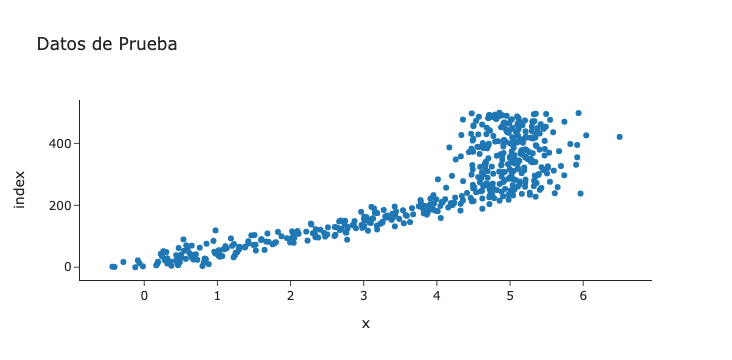

In [17]:
import plotly.express as px

x, y = make_test_data(500, 0.4)
px.scatter(x, y, title='Datos de Prueba',template='simple_white')

Donde nuestra función de perdida viene dada por:

In [18]:
class MSELoss():
    '''User-Defined Squared Error Loss'''
    
    @staticmethod
    def loss(y, preds):
        return np.mean((y - preds)**2)
    
    @staticmethod
    def negative_gradient(y, preds):
        return y - preds
    

gbm = GradientBoostingMachine(n_trees=100,
                                  learning_rate=0.5,
                                  max_depth=1,
                                  loss_function=MSELoss()
                                 )
gbm.fit(x, y)
pred = gbm.predict(x)

In [19]:
pred[:10]

array([-0.15898442, -0.15898442, -0.15898442,  0.00728474,  0.32093797,
        0.32093797,  0.32093797,  0.32093797,  0.32093797,  0.32093797])

Con los datos generamos un loop para visualizar como es el impacto que los estimadores dentro de la regresión, con esto obtenemos los siguientes gráficos:

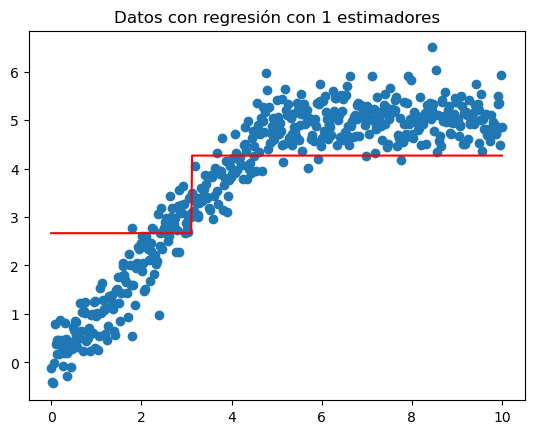

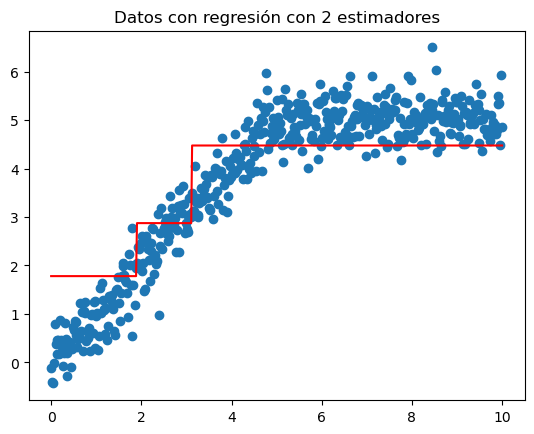

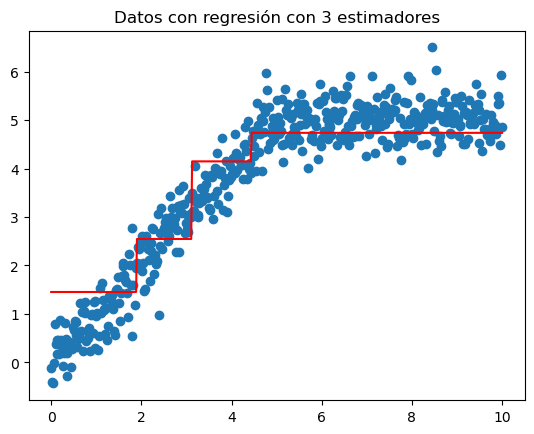

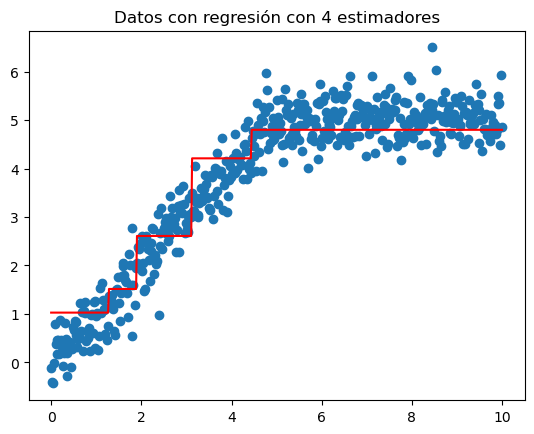

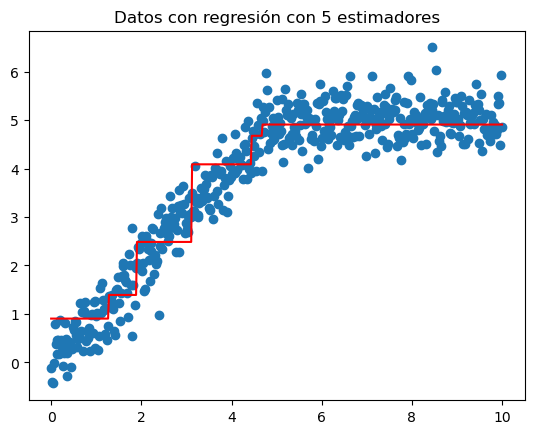

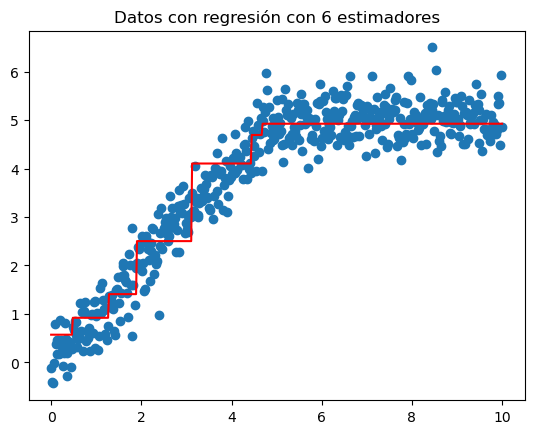

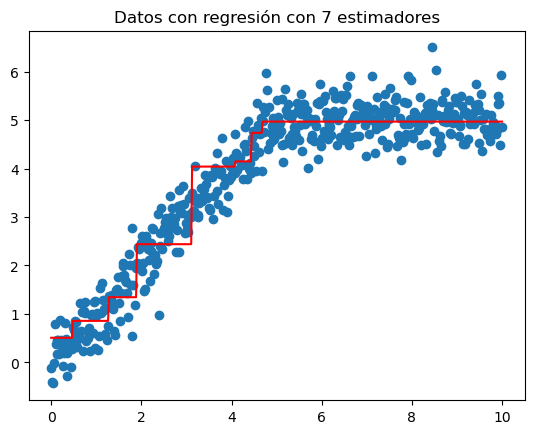

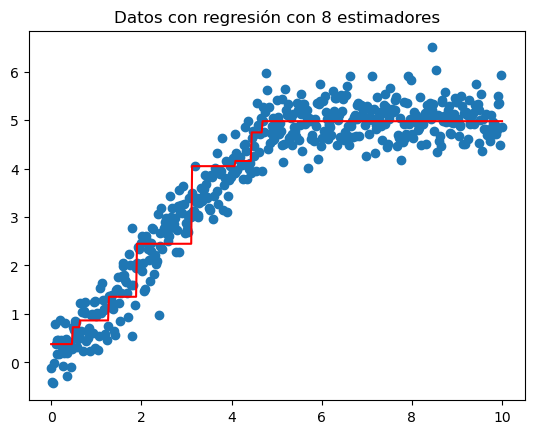

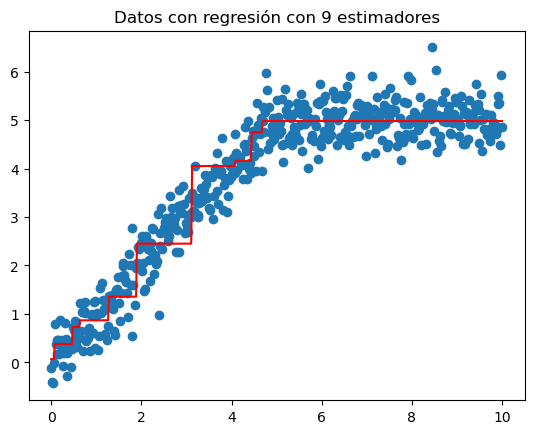

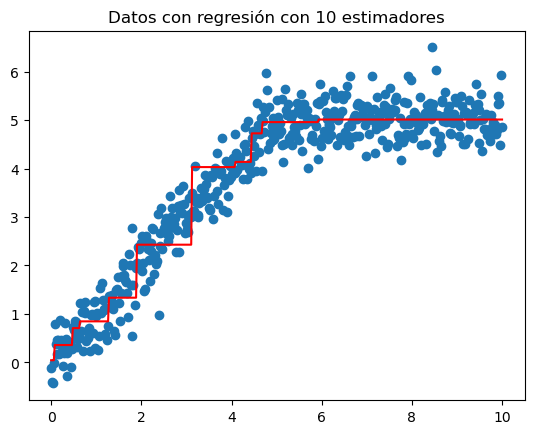

In [21]:
import matplotlib.pyplot as plt

def plot_regresion(x, y, y_pred, name="Datos con regresión", color='r'):
    plt.scatter(x, y)
    plt.plot(x, pred, color='r')
    plt.title(name)
    plt.show()
    
for i in range(1, 11):
    gbm = GradientBoostingMachine(n_trees=i,
                                  learning_rate=0.5,
                                  max_depth=1,
                                  loss_function=MSELoss()
                                 )
    gbm.fit(x, y)
    pred = gbm.predict(x)
    name_plot = f"Datos con regresión con {i} estimadores"
    plot_regresion(x, y, pred, name=name_plot)

Comprobemos si esto tiene sentido con el clasificador de boosting que viene en sklearn:

In [11]:
sk_gbm = GradientBoostingRegressor(n_estimators=10,
                                   learning_rate=0.5,
                                   max_depth=1)
sk_gbm.fit(x, y)
sk_pred = sk_gbm.predict(x)

In [13]:
print_model_loss_scores(MSELoss(), y, pred, sk_pred)

From Scratch Loss = 0.1811
Scikit-Learn Loss = 0.1811


De los resultados se observa que a medida que aumentamos el número de estimadores es posible generar una regresión más similar a la tendencia que señalan los datos, por lo que la adición de weak-learners a nuestro modelo fue efectivo!

## Retrospectiva

		❓ Pregunta: ¿añadir muchos estimadores que puede provocar?
		❓ Pregunta: Sabemos que los árboles son interpretables, ¿que sucede con los algoritmos de ensemle?
		❓ Pregunta: ¿Comó podemos medir el sobre ajuste de estos modelos si son multiples árboles?
		❓ Pregunta: ¿A nivel general son buenos estimadores los GBM?
		

Links de interes:
https://explained.ai/gradient-boosting/descent.html
https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html
https://explained.ai/gradient-boosting/L2-loss.html